In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error

In [62]:
df1 = pd.read_csv('Metadata_Country_API_19_DS2_en_csv_v2_5361599.csv')
df2 = pd.read_csv('Metadata_Indicator_API_19_DS2_en_csv_v2_5361599.csv')
df3 = pd.read_csv('GDP.csv')

In [8]:
df1

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN
...,...,...,...,...,...,...
260,XKX,Europe & Central Asia,Upper middle income,NaN,Kosovo,NaN
261,YEM,Middle East & North Africa,Low income,The World Bank systematically assesses the app...,"Yemen, Rep.",NaN
262,ZAF,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa,NaN
263,ZMB,Sub-Saharan Africa,Low income,National accounts data were rebased to reflect...,Zambia,NaN


In [9]:
df2

,INDICATOR_CODE,INDICATOR_NAME,SOURCE_NOTE,SOURCE_ORGANIZATION,Unnamed: 4
0,SP.URB.TOTL.IN.ZS,Urban population (% of total population),Urban population refers to people living in ur...,United Nations Population Division. World Urba...,NaN
1,SP.URB.TOTL,Urban population,Urban population refers to people living in ur...,World Bank staff estimates based on the United...,NaN
2,SP.URB.GROW,Urban population growth (annual %),Urban population refers to people living in ur...,World Bank staff estimates based on the United...,NaN
3,SP.POP.TOTL,"Population, total",Total population is based on the de facto defi...,(1) United Nations Population Division. World ...,NaN
4,SP.POP.GROW,Population growth (annual %),Annual population growth rate for year t is th...,Derived from total population. Population sour...,NaN
...,...,...,...,...,...
71,AG.LND.EL5M.RU.ZS,Rural land area where elevation is below 5 met...,Rural land area below 5m is the percentage of ...,Center for International Earth Science Informa...,NaN
72,AG.LND.EL5M.RU.K2,Rural land area where elevation is below 5 met...,Rural land area below 5m is the total rural la...,Center for International Earth Science Informa...,NaN
73,AG.LND.ARBL.ZS,Arable land (% of land area),Arable land includes land defined by the FAO a...,"Food and Agriculture Organization, electronic ...",NaN
74,AG.LND.AGRI.ZS,Agricultural land (% of land area),Agricultural land refers to the share of land ...,"Food and Agriculture Organization, electronic ...",NaN


In [63]:
df3


,Country,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,24101.109430,25870.755940,26533.343900,27430.752400,28656.520210,28648.990020,28499.089430,30215.949230,...,33732.847450,35492.618490,35498.982090,37419.892820,38223.372260,38249.054870,38390.271650,39454.629830,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1637.377987,1626.764793,1806.763930,1874.765634,1897.525938,1886.692977,1896.992520,1934.636754,1955.006208,NaN
2,Angola,AGO,3089.683369,3120.356148,2908.160798,2190.768160,2195.532289,2496.199493,2794.896906,2953.342709,...,6230.297028,6346.395122,6772.528333,6980.423038,7199.245478,7096.600615,6756.935074,6650.584940,6452.355165,NaN
3,Albania,ALB,2549.473022,1909.114038,1823.307673,2057.449657,2289.873135,2665.764906,2980.066288,2717.362124,...,9628.025783,10207.752350,10526.235450,10571.010650,11259.225890,11662.030480,11868.178970,12930.140030,13364.155400,NaN
4,Arab World,ARB,6808.206995,6872.273195,7255.328362,7458.647059,7645.682856,7774.207360,8094.149842,8397.515692,...,14127.778020,14518.827450,15423.465390,15824.780110,16153.244860,16501.792590,16935.383300,17099.889390,17570.137600,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7782.875107,8222.285712,8547.652384,8903.763429,9194.741819,9781.019679,10208.857900,10756.663460,11348.363450,NaN
256,"Yemen, Rep.",YEM,2223.028771,2325.263661,2443.920401,2472.188808,2569.648739,2657.813447,2730.145147,2829.866193,...,4472.726448,3876.302619,3935.167105,4084.882967,4045.500031,3320.110156,2827.691023,2645.308383,2575.126385,NaN
257,South Africa,ZAF,6424.502215,6414.057923,6261.716184,6331.777580,6520.866604,6719.583315,7000.801619,7179.806651,...,11728.160490,12179.174190,12488.215570,12815.727070,13090.476830,13185.253280,13188.029620,13438.282890,13686.882360,NaN
258,Zambia,ZMB,1517.926292,1528.781247,1499.340446,1600.347799,1457.627696,1493.123972,1572.973238,1616.492883,...,3269.794329,3419.010460,3634.780353,3765.584162,3893.549478,3927.761816,3998.004435,4090.120040,4223.906936,NaN


In [10]:
df1.describe

<bound method NDFrame.describe of     Country Code                      Region          IncomeGroup  \
0            ABW   Latin America & Caribbean          High income   
1            AFE                         NaN                  NaN   
2            AFG                  South Asia           Low income   
3            AFW                         NaN                  NaN   
4            AGO          Sub-Saharan Africa  Lower middle income   
..           ...                         ...                  ...   
260          XKX       Europe & Central Asia  Upper middle income   
261          YEM  Middle East & North Africa           Low income   
262          ZAF          Sub-Saharan Africa  Upper middle income   
263          ZMB          Sub-Saharan Africa           Low income   
264          ZWE          Sub-Saharan Africa  Lower middle income   

                                          SpecialNotes  \
0                                                  NaN   
1    26 countries, st

In [11]:
df2.describe

<bound method NDFrame.describe of        INDICATOR_CODE                                     INDICATOR_NAME  \
0   SP.URB.TOTL.IN.ZS           Urban population (% of total population)   
1         SP.URB.TOTL                                   Urban population   
2         SP.URB.GROW                 Urban population growth (annual %)   
3         SP.POP.TOTL                                  Population, total   
4         SP.POP.GROW                       Population growth (annual %)   
..                ...                                                ...   
71  AG.LND.EL5M.RU.ZS  Rural land area where elevation is below 5 met...   
72  AG.LND.EL5M.RU.K2  Rural land area where elevation is below 5 met...   
73     AG.LND.ARBL.ZS                       Arable land (% of land area)   
74     AG.LND.AGRI.ZS                 Agricultural land (% of land area)   
75     AG.LND.AGRI.K2                         Agricultural land (sq. km)   

                                          SOURCE_NOTE

In [12]:
df1.info

<bound method DataFrame.info of     Country Code                      Region          IncomeGroup  \
0            ABW   Latin America & Caribbean          High income   
1            AFE                         NaN                  NaN   
2            AFG                  South Asia           Low income   
3            AFW                         NaN                  NaN   
4            AGO          Sub-Saharan Africa  Lower middle income   
..           ...                         ...                  ...   
260          XKX       Europe & Central Asia  Upper middle income   
261          YEM  Middle East & North Africa           Low income   
262          ZAF          Sub-Saharan Africa  Upper middle income   
263          ZMB          Sub-Saharan Africa           Low income   
264          ZWE          Sub-Saharan Africa  Lower middle income   

                                          SpecialNotes  \
0                                                  NaN   
1    26 countries, stre

In [13]:
df2.info

<bound method DataFrame.info of        INDICATOR_CODE                                     INDICATOR_NAME  \
0   SP.URB.TOTL.IN.ZS           Urban population (% of total population)   
1         SP.URB.TOTL                                   Urban population   
2         SP.URB.GROW                 Urban population growth (annual %)   
3         SP.POP.TOTL                                  Population, total   
4         SP.POP.GROW                       Population growth (annual %)   
..                ...                                                ...   
71  AG.LND.EL5M.RU.ZS  Rural land area where elevation is below 5 met...   
72  AG.LND.EL5M.RU.K2  Rural land area where elevation is below 5 met...   
73     AG.LND.ARBL.ZS                       Arable land (% of land area)   
74     AG.LND.AGRI.ZS                 Agricultural land (% of land area)   
75     AG.LND.AGRI.K2                         Agricultural land (sq. km)   

                                          SOURCE_NOTE  

In [14]:
df1.isnull().sum()

Country Code      0
Region           48
IncomeGroup      49
SpecialNotes    138
TableName         0
Unnamed: 5      265
dtype: int64

In [15]:
df2.isnull().sum()

INDICATOR_CODE          0
INDICATOR_NAME          0
SOURCE_NOTE             0
SOURCE_ORGANIZATION     0
Unnamed: 4             76
dtype: int64

In [64]:
df3.isnull().sum()

Country           0
Country Code      0
1990             51
1991             49
1992             47
1993             45
1994             42
1995             36
1996             36
1997             35
1998             34
1999             33
2000             24
2001             23
2002             22
2003             22
2004             22
2005             22
2006             22
2007             21
2008             20
2009             19
2010             19
2011             17
2012             19
2013             19
2014             20
2015             22
2016             22
2017             22
2018             29
2019            260
dtype: int64

In [23]:
df1.fillna(0)

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,0,Aruba,0.0
1,AFE,0,0,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,0.0
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,0.0
3,AFW,0,0,"22 countries, stretching from the westernmost ...",Africa Western and Central,0.0
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,0.0
...,...,...,...,...,...,...
260,XKX,Europe & Central Asia,Upper middle income,0,Kosovo,0.0
261,YEM,Middle East & North Africa,Low income,The World Bank systematically assesses the app...,"Yemen, Rep.",0.0
262,ZAF,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa,0.0
263,ZMB,Sub-Saharan Africa,Low income,National accounts data were rebased to reflect...,Zambia,0.0


In [24]:
df2.fillna(0)

,INDICATOR_CODE,INDICATOR_NAME,SOURCE_NOTE,SOURCE_ORGANIZATION,Unnamed: 4
0,SP.URB.TOTL.IN.ZS,Urban population (% of total population),Urban population refers to people living in ur...,United Nations Population Division. World Urba...,0.0
1,SP.URB.TOTL,Urban population,Urban population refers to people living in ur...,World Bank staff estimates based on the United...,0.0
2,SP.URB.GROW,Urban population growth (annual %),Urban population refers to people living in ur...,World Bank staff estimates based on the United...,0.0
3,SP.POP.TOTL,"Population, total",Total population is based on the de facto defi...,(1) United Nations Population Division. World ...,0.0
4,SP.POP.GROW,Population growth (annual %),Annual population growth rate for year t is th...,Derived from total population. Population sour...,0.0
...,...,...,...,...,...
71,AG.LND.EL5M.RU.ZS,Rural land area where elevation is below 5 met...,Rural land area below 5m is the percentage of ...,Center for International Earth Science Informa...,0.0
72,AG.LND.EL5M.RU.K2,Rural land area where elevation is below 5 met...,Rural land area below 5m is the total rural la...,Center for International Earth Science Informa...,0.0
73,AG.LND.ARBL.ZS,Arable land (% of land area),Arable land includes land defined by the FAO a...,"Food and Agriculture Organization, electronic ...",0.0
74,AG.LND.AGRI.ZS,Agricultural land (% of land area),Agricultural land refers to the share of land ...,"Food and Agriculture Organization, electronic ...",0.0


In [65]:
df3.fillna(0)

,Country,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,24101.109430,25870.755940,26533.343900,27430.752400,28656.520210,28648.990020,28499.089430,30215.949230,...,33732.847450,35492.618490,35498.982090,37419.892820,38223.372260,38249.054870,38390.271650,39454.629830,0.000000,0.0
1,Afghanistan,AFG,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1637.377987,1626.764793,1806.763930,1874.765634,1897.525938,1886.692977,1896.992520,1934.636754,1955.006208,0.0
2,Angola,AGO,3089.683369,3120.356148,2908.160798,2190.768160,2195.532289,2496.199493,2794.896906,2953.342709,...,6230.297028,6346.395122,6772.528333,6980.423038,7199.245478,7096.600615,6756.935074,6650.584940,6452.355165,0.0
3,Albania,ALB,2549.473022,1909.114038,1823.307673,2057.449657,2289.873135,2665.764906,2980.066288,2717.362124,...,9628.025783,10207.752350,10526.235450,10571.010650,11259.225890,11662.030480,11868.178970,12930.140030,13364.155400,0.0
4,Arab World,ARB,6808.206995,6872.273195,7255.328362,7458.647059,7645.682856,7774.207360,8094.149842,8397.515692,...,14127.778020,14518.827450,15423.465390,15824.780110,16153.244860,16501.792590,16935.383300,17099.889390,17570.137600,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Kosovo,XKX,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7782.875107,8222.285712,8547.652384,8903.763429,9194.741819,9781.019679,10208.857900,10756.663460,11348.363450,0.0
256,"Yemen, Rep.",YEM,2223.028771,2325.263661,2443.920401,2472.188808,2569.648739,2657.813447,2730.145147,2829.866193,...,4472.726448,3876.302619,3935.167105,4084.882967,4045.500031,3320.110156,2827.691023,2645.308383,2575.126385,0.0
257,South Africa,ZAF,6424.502215,6414.057923,6261.716184,6331.777580,6520.866604,6719.583315,7000.801619,7179.806651,...,11728.160490,12179.174190,12488.215570,12815.727070,13090.476830,13185.253280,13188.029620,13438.282890,13686.882360,0.0
258,Zambia,ZMB,1517.926292,1528.781247,1499.340446,1600.347799,1457.627696,1493.123972,1572.973238,1616.492883,...,3269.794329,3419.010460,3634.780353,3765.584162,3893.549478,3927.761816,3998.004435,4090.120040,4223.906936,0.0


In [37]:
df2[['INDICATOR_NAME', 'SOURCE_NOTE', 'SOURCE_ORGANIZATION']] = df2[['INDICATOR_NAME', 'SOURCE_NOTE', 'SOURCE_ORGANIZATION']].apply(lambda col:pd.Categorical(col).codes)

In [67]:
df3[['Country']] = df2[['Country']].apply(lambda col:pd.Categorical(col).codes)

KeyError: "None of [Index(['Country'], dtype='object')] are in the [columns]"

<ipython-input-48-3a5c2cf0f3e5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(), annot = True, cmap="YlGnBu")


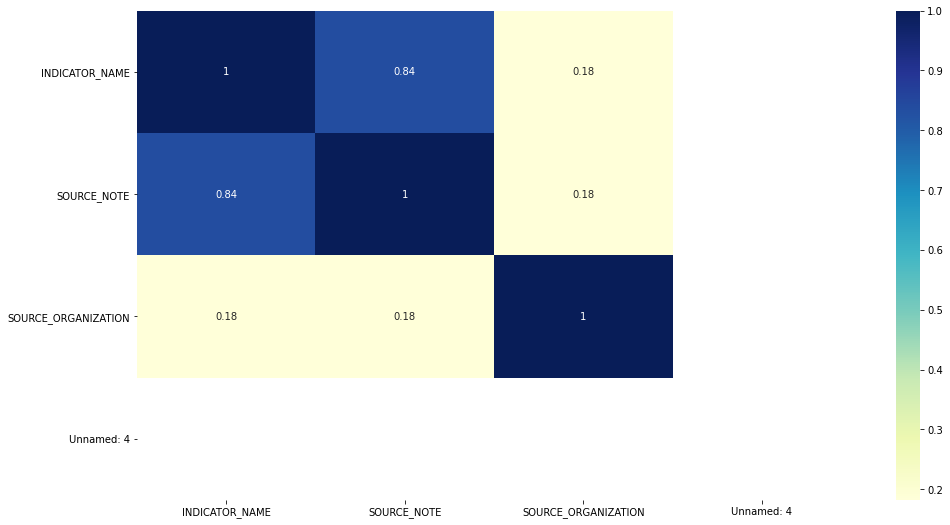

In [48]:
plt.figure(figsize=(16,9))
sns.heatmap(df2.corr(), annot = True, cmap="YlGnBu")
plt.show()

<Figure size 864x576 with 0 Axes>

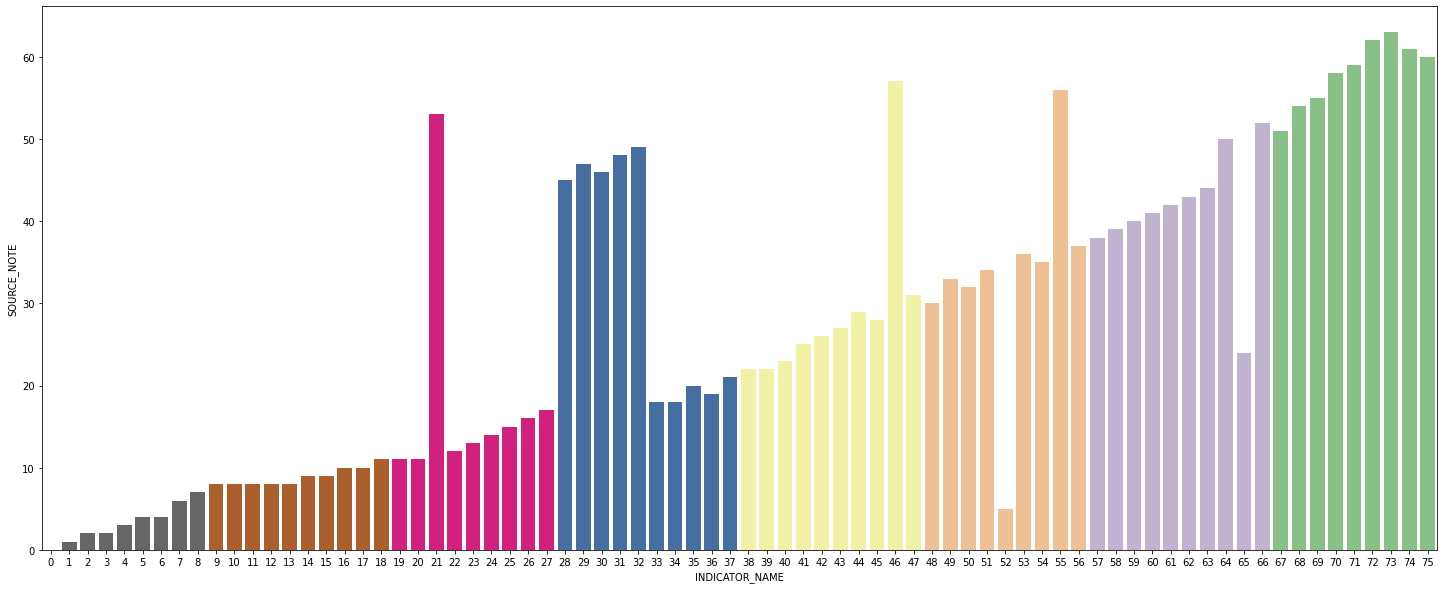

<Figure size 864x576 with 0 Axes>

In [57]:
fig = plt.figure(figsize = (25,10))
sns.barplot(x ='INDICATOR_NAME', y = 'SOURCE_NOTE', palette = 'Accent_r', data = df2)
plt.figure(figsize=(12,8))

<Figure size 864x576 with 0 Axes>

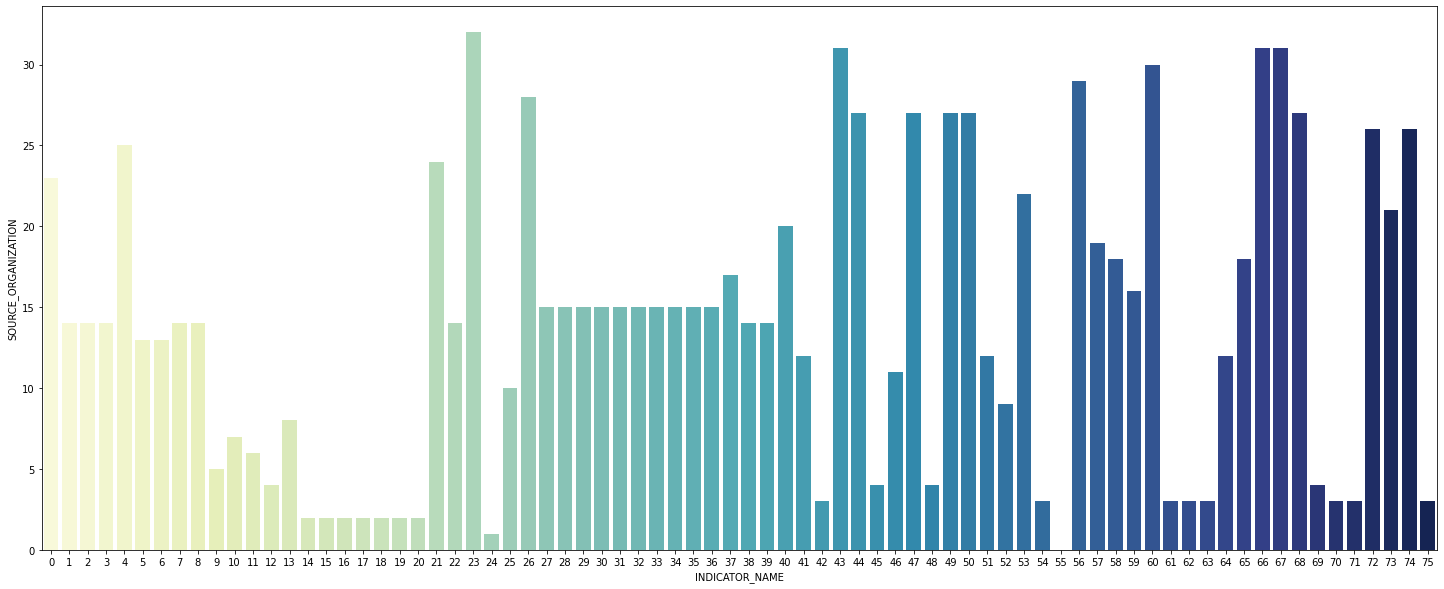

<Figure size 864x576 with 0 Axes>

In [59]:
fig = plt.figure(figsize = (25,10))
sns.barplot(x ='INDICATOR_NAME', y = 'SOURCE_ORGANIZATION', palette = 'YlGnBu', data = df2)
plt.figure(figsize=(12,8))

Text(0, 0.5, 'GDP')

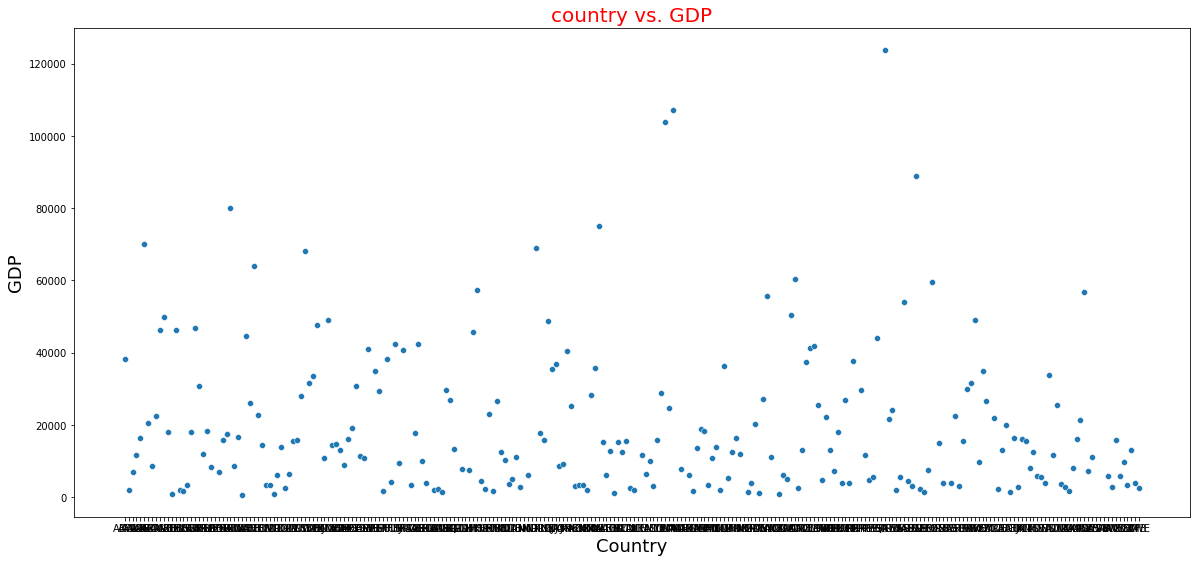

In [75]:
fig = plt.figure(figsize = (20,9))
plt.title('country vs. GDP',color="red", fontsize=20)
sns.scatterplot(x ='Country Code', y = '2015', data = df3)
plt.xlabel("Country", fontsize=18)
plt.ylabel("GDP", fontsize=18)